Import Libraries

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.model_selection import GridSearchCV

In [8]:
def plot_data(X,y,ax,title):
    ax.scatter(X[:, 0], X[:, 1], c=y, alpha=0.5, s = 30, edgecolor=(0,0,0,0.5))
    ax.set_ylabel('Principle Component 1')
    ax.set_xlabel('Principle Component 2')
    if title is not None:
        ax.set_title(title)

Define layer name

In [9]:
folder_name = 'label_09'

*Label* 02

In [10]:
cols = list(pd.read_csv(f"drive/MyDrive/ML Project/train.csv", nrows=1))
train_data = pd.read_csv(f"drive/MyDrive/ML Project/train.csv",usecols =[i for i in cols if i not in ["label_4", "label_3", "label_1"]])
train_data.shape

(28520, 769)

Handling missing values

In [11]:
train_data = train_data.dropna()
print(train_data.shape)
train_data.head()

(28040, 769)


,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_760,feature_761,feature_762,feature_763,feature_764,feature_765,feature_766,feature_767,feature_768,label_2
480,-0.037427,0.068284,-0.100538,0.076783,-0.113147,-0.079453,0.106947,0.011906,-0.047519,0.022915,...,0.086089,0.004285,-0.325560,-0.035784,0.033521,-0.025551,0.083790,-0.027678,-0.008546,25.0
481,0.024931,0.045966,0.016385,0.028214,-0.092396,-0.053490,-0.018101,0.053902,0.080196,0.010693,...,0.127840,0.060487,-0.268356,-0.001359,0.019178,0.068597,0.066214,0.141953,0.075839,25.0
482,0.025077,0.082511,0.074441,0.124308,-0.037937,-0.089271,0.012489,-0.036005,-0.023984,-0.010576,...,0.121891,0.042131,-0.019572,-0.095350,0.087392,0.007523,0.030705,0.086901,0.031186,25.0
483,0.030733,0.060249,0.099119,0.087801,-0.035729,-0.152115,0.032606,0.024821,0.032655,0.053826,...,0.094773,-0.043471,-0.177032,-0.091252,0.031182,-0.034731,0.004988,0.143666,-0.012354,25.0
484,0.012062,0.068691,0.051343,0.049753,0.006491,-0.107100,0.076212,0.004650,0.113739,0.004015,...,0.123084,0.046536,-0.053508,-0.025445,0.062129,-0.034741,0.042223,-0.024982,0.132500,25.0


numbers of missing values neglegible

Import test data set

In [12]:
cols = list(pd.read_csv(f"drive/MyDrive/ML Project/valid.csv", nrows=1))
valid_data = pd.read_csv(f"drive/MyDrive/ML Project/valid.csv",usecols =[i for i in cols if i not in ["label_4", "label_3", "label_1"]])
valid_data.shape

(750, 769)

Handling missing values

In [13]:
valid_data = valid_data.dropna()
valid_data.shape

(736, 769)

In [14]:
#features
X_train = train_data.iloc[:,:-1]
Y_train = train_data.iloc[:,-1]
X_valid = valid_data.iloc[:,:-1]
Y_valid = valid_data.iloc[:,-1]

Standarization

In [15]:
robust_scaler = RobustScaler()
robust_scaler.fit(X_train)

X_train_scaler = robust_scaler.transform(X_train)
X_valid_scaler = robust_scaler.transform(X_valid)

Dimensionality reduction

In [16]:
pca = PCA(0.98)
pca = pca.fit(X_train_scaler)

X_train_pca = pca.transform(X_train_scaler)
X_valid_pca = pca.transform(X_valid_scaler)
X_train_pca.shape

(28040, 466)

oversampling and undersampling

<Axes: title={'center': 'Count of Label_2'}>

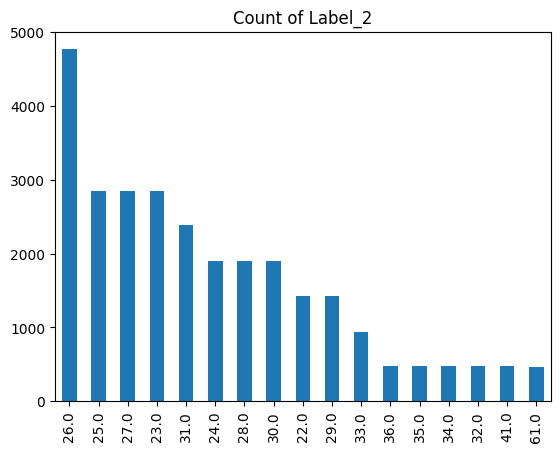

In [17]:
train_data['label_2'].value_counts().plot(kind='bar',title='Count of Label_2')

In [ ]:
from imblearn.combine import SMOTETomek
import matplotlib.pyplot as plt
# Perform random sampling
smotetomek = SMOTETomek(random_state=0)
X_train_smt, Y_train_smt = smotetomek.fit_resample(X_train_pca, Y_train)
fig,ax = plt.subplots(figsize=(5, 5))
plot_data(X_train_smt, Y_train_smt, ax, title='Unbaised Dataset')
print(X_train_smt.shape)

Using SVC

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc_init = SVC()
svc_init.fit(X_train_scaler,Y_train)
svc_predicted = svc_init.predict(X_valid_scaler)
accuracy_score(Y_valid,svc_predicted)

After feature engineering

In [ ]:
svc = SVC()
svc.fit(X_train_smt, Y_train_smt)
svc_predicted = svc.predict(X_valid_pca)
accuracy_score(Y_valid,svc_predicted)

Hyper Parameter tuning without dimentionality reduction

In [ ]:
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

# fitting the model for grid search
grid.fit(X_train_smt, Y_train_smt)

# print best parameter after tuning
print(grid.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

In [ ]:
grid_predictions = grid.predict(X_valid_pca)

# print classification report
accuracy_score(Y_valid, grid_predictions)

In [ ]:
cols = list(pd.read_csv(f"drive/MyDrive/ML Project/test.csv", nrows=1))
test_data = pd.read_csv(f"drive/MyDrive/ML Project/test.csv",usecols =[i for i in cols if i not in ["label_1", "label_3", "label_4"]])
#features
X_test = test_data.iloc[:,1:]
X_test.head()

X_test_scaler = robust_scaler.transform(X_test)
X_test_pca = pca.transform(X_test_scaler)

grid_predictions = svc.predict(X_test_pca)
grid_predictions

In [ ]:
size = grid_predictions.size
index = []
for i in range(size):
    index.append(i+1)
data = {
    'ID': index,
    'label_2': grid_predictions
}
df = pd.DataFrame(data)
df.to_csv('drive/MyDrive/ML Project/09-2.csv', index=False)